# 从线性回归来认识机器学习

## 统计学习的三要素

1. 模型的假设空间(hypothesis space)，简称：模型(model)。假设空间即我们对模型形式的先验假设，最终我们求得的模型必定符合我们对模型形式的先验假设。
2. 模型选择的准则(evaluation criterion)，简称：策略(strategy)或者学习准则。即我们用什么标准来评价一个模型的好坏。策略决定了我们从假设空间中选择模型的偏好。
3. 模型学习的算法(algorithm)，简称：算法(algorithm)。优化算法指的是通过什么样的方式调整我们的模型结构或模型超参数取值，使得模型的目标函数取值不断降低。优化算法决定了我们用什么样的步骤在假设空间中寻找合适的模型。


## 机器学习的定义

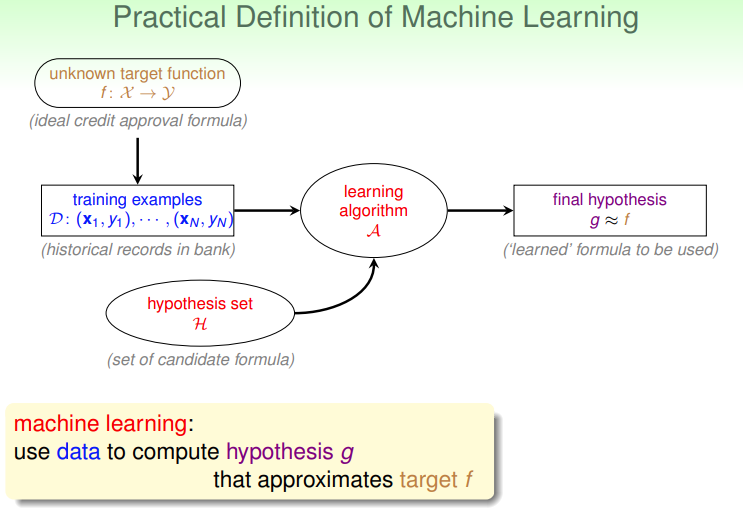


## 线性回归

### 线性回归的基本形式
```
y = wx + b
```
其中：
- y 是预测值
- w 是权重（斜率）
- x 是特征值
- b 是偏置项（截距）

### 数学表达
$$\mathcal h_\theta(x) = \theta_0 + \theta_1x_1+ \theta_2x_2 + ...  + \theta_nx_n$$

其中
- $\mathcal h_\theta(x)$是预测函数
- $\mathcal \theta_0$是偏置项
- $\mathcal \theta_1$到$\mathcal \theta_n$是特征的权重

### 三要素

模型： $f(x;w,b) = w^Tx +b$

策略(strategy)或者学习准则: 平方损失函数 $\mathcal L(y,\hat{y}) = (y-f(x,\theta))^2$ 或者均方误差

算法：解析解 analytical solution(闭式解 closed-form solution)和数值解 numerical solution，如：closed-form 的最小二乘的解以及梯度下降法


### 损失函数
哪一条线才是最好的

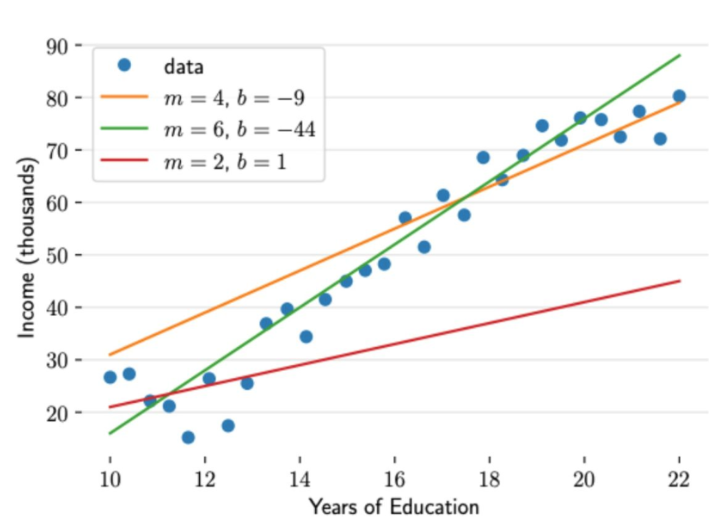

$\mathcal L(y,\hat{y}) = (y-f(x,\theta))^2$

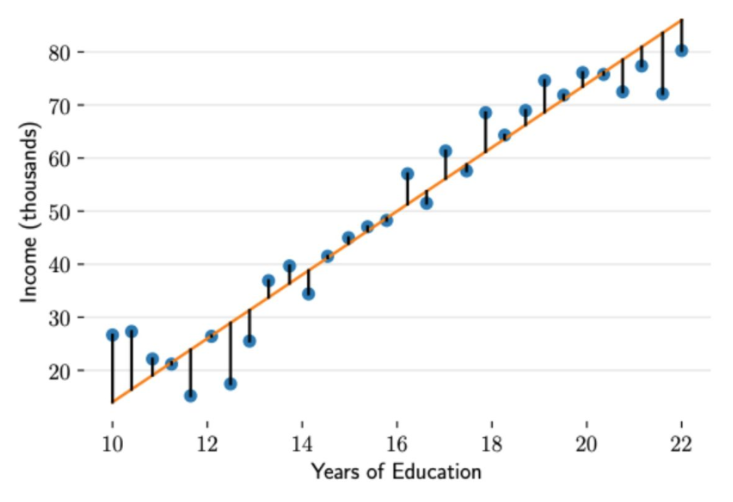


### 求解损失函数
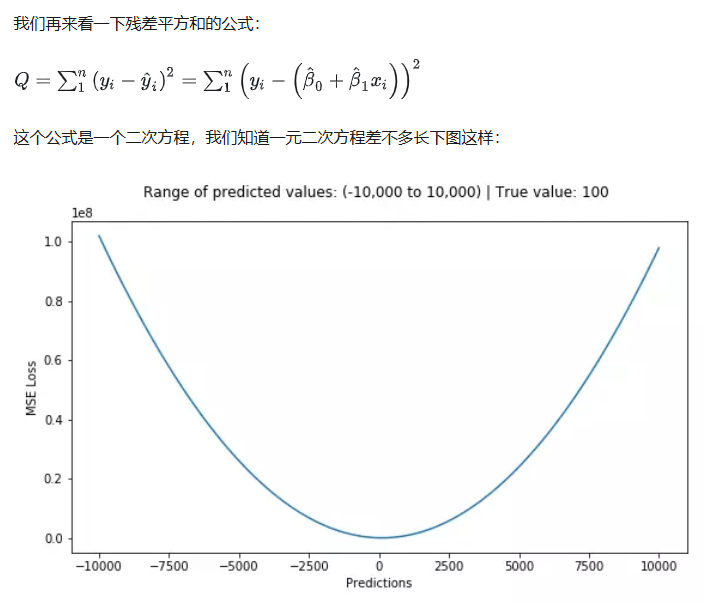

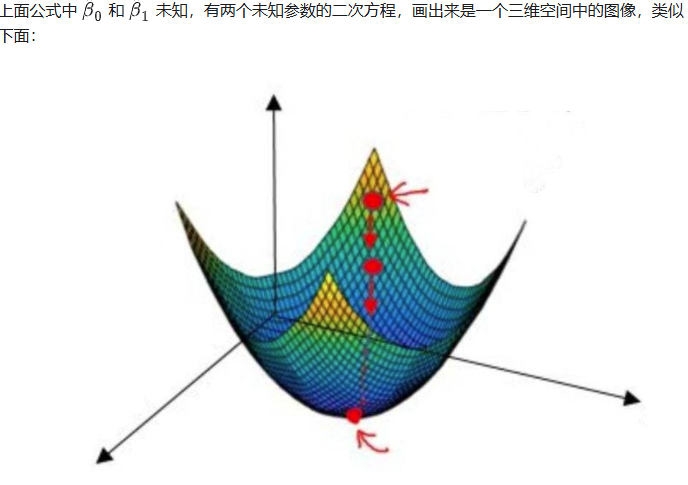

### 过拟合(overfitting)
模型在训练集上表现很好，但在测试集上却表现很差

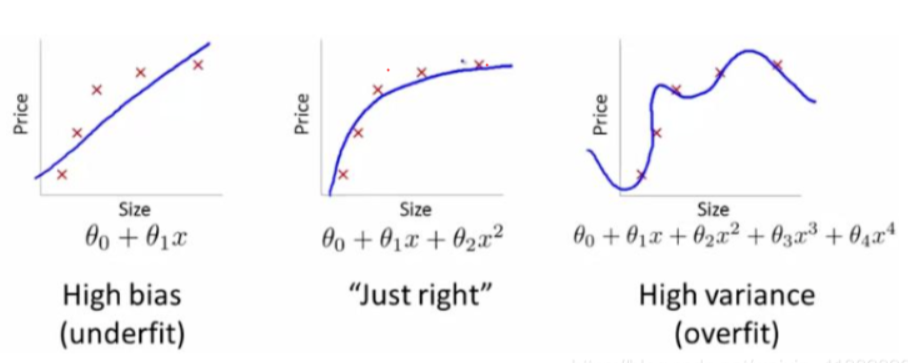

#### 过拟合出现原因
- 建模样本选取有误，如样本数量太少，选样方法错误，样本标签错误等，导致选取的样本数据不足以代表预定的分类规则
- 样本噪音干扰过大，使得机器将部分噪音认为是特征从而扰乱了预设的分类规则
- 假设的模型无法合理存在，或者说是假设成立的条件实际并不成立
- 参数太多，模型复杂度过高
- 对于决策树模型，如果我们对于其生长没有合理的限制，其自由生长有可能使节点只包含单纯的事件数据(event)或非事件数据(no event)，使其虽然可以完美匹配（拟合）训练数据，但是无法适应其他数据集
- 对于神经网络模型：a)对样本数据可能存在分类决策面不唯一，随着学习的进行，BP算法使权值可能收敛过于复杂的决策面；b)权值学习迭代次数足够多(Overtraining)，拟合了训练数据中的噪声和训练样例中没有代表性的特征

#### 解决过拟合的方法

1. 增加训练数据数

发生过拟合最常见的现象就是数据量太少而模型太复杂

2. 使用正则化约束
在代价函数后面添加正则化项，可以避免训练出来的参数过大从而使模型过拟合。使用正则化缓解过拟合的手段广泛应用，不论是在线性回归还是在神经网络的梯度下降计算过程中，都应用到了正则化的方法。常用的正则化有l1正则和l2正则，具体使用哪个视具体情况而定，一般l2正则应用比较多

3. 减少特征数
欠拟合需要增加特征数，那么过拟合自然就要减少特征数。去除那些非共性特征，可以提高模型的泛化能力

4. 调整参数和超参数
不论什么情况，调参是必须的

5. 降低模型的复杂度
 欠拟合要增加模型的复杂度，那么过拟合正好反过来

6. 使用Dropout
 这一方法只适用于神经网络中，即按一定的比例去除隐藏层的神经单元，使神经网络的结构简单化

7. 提前结束训练
即early stopping，在模型迭代训练时候记录训练精度(或损失)和验证精度(或损失)，倘若模型训练的效果不再提高，比如训练误差一直在降低但是验证误差却不再降低甚至上升，这时候便可以结束模型训练了

#### 正则化

正则化通过在模型的损失函数中引入额外的惩罚项，来对模型的参数进行约束，从而降低模型的复杂度。这个额外的惩罚通常与模型参数的大小或者数量相关，旨在鼓励模型学习简单的规律，而不是过度拟合训练数据。

##### 正则化的作用
1. 防止过拟合：正则化通过对模型的复杂度进行限制，防止模型在训练数据上过度拟合。过拟合指的是模型在训练数据上表现良好，但在未见过的数据上表现较差的情况，这可能是因为模型学习到了训练数据中的噪声或者细节，而无法泛化到新数据上。正则化有助于使模型更加简单，从而提高其在未见过的数据上的泛化能力。

2. 提高模型的泛化能力：正则化约束了模型的复杂度，使其更容易泛化到未见过的数据上。通过控制模型的参数大小或数量，正则化可以使模型更加稳定，减少对训练数据的过度依赖，从而提高模型的泛化能力。

3. 减少模型的复杂度：正则化技术通过对模型的参数进行惩罚，促使模型更趋向于简单的解。例如，L1 和 L2 正则化会约束模型的权重，使其趋向于稀疏或较小的值，从而减少模型的复杂度。

4. 控制模型的学习速度：正则化技术可以对模型的学习速度进行调节，防止模型在训练过程中权重变化过大，从而导致优化过程不稳定。这有助于加速模型的收敛，并提高模型在训练数据上的表现。

5. 提高模型的鲁棒性：正则化有助于使模型更加鲁棒，即对输入数据的微小变化不敏感。通过降低模型的复杂度，正则化可以减少模型对训练数据中噪声的敏感度，从而提高模型的鲁棒性。

##### L2 正则化
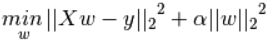

意思就是尽量降低loss的同时, 希望$||w||^2_2$也不要太大, 同时考虑数据损失和正则化项，从而在保持对训练数据的拟合能力的同时，尽可能减小模型参数的大小，降低模型的复杂度。


### 交叉验证：评估模型表现
交叉验证是在机器学习建立模型和验证模型参数时常用的办法，一般被用于评估一个机器学习模型的表现。更多的情况下，我们也用交叉验证来进行模型选择(model selection)。

交叉验证，顾名思义，就是重复的使用数据，把得到的样本数据进行切分，组合为不同的训练集和测试集，用训练集来训练模型，用测试集来评估模型预测的好坏。在此基础上可以得到多组不同的训练集和测试集，某次训练集中的某样本在下次可能成为测试集中的样本，即所谓“交叉”。

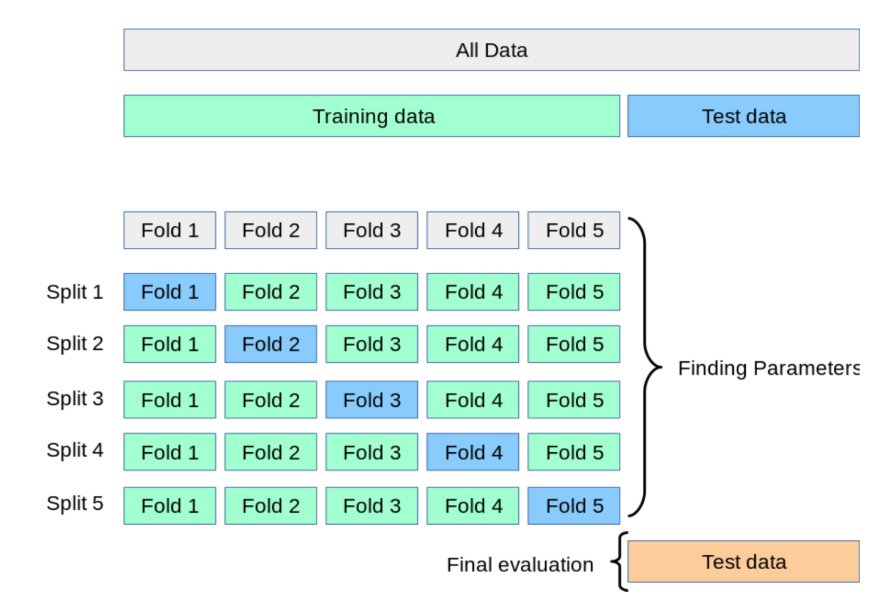


### 实际应用注意事项
- 数据清洗和预处理很重要
- 特征工程可以提升模型性能
- 需要处理异常值和缺失值
- 考虑特征之间的相关性
- 注意过拟合和欠拟合问题

### 案例

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Price')

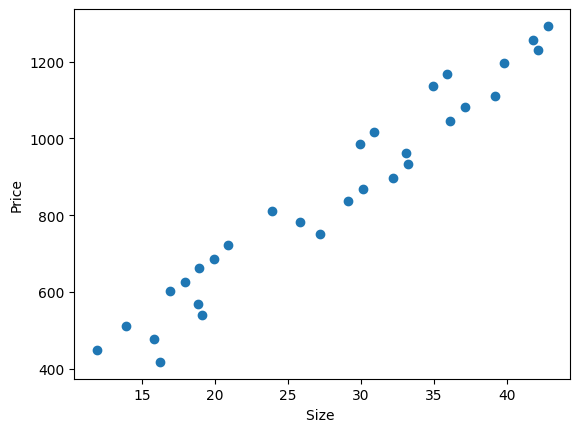

In [6]:
from random import choice

exp = []
sal = []
for i in range(14 , 44):
    exp.append(i + choice([1.1 , 2.2, -3.1 , -0.2]))
    sal.append(29.97*i - 0.35 +choice([2.2 ,-3.2 , 4.3,-1.3]))

df = pd.DataFrame(list(zip(exp, sal)), columns = "Exp Sal".split())

df.to_csv('SizeVsPrice.csv',index=False)
plt.scatter(exp, sal)
plt.xlabel('Size ')
plt.ylabel('Price')

#### 导入数据集

In [8]:
dataset = pd.read_csv('SizeVsPrice.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.shape

(30, 2)

#### 拆分测试集

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)
print(X_test)
print(y_test)

[[15.8]
 [41.8]
 [23.9]
 [20.9]
 [39.8]
 [34.9]
 [42.1]
 [27.2]]
[ 477.87 1255.19  811.04  723.23 1197.15 1135.31 1230.62  751.1 ]


#### 训练

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### 预测测试集

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([ 527.41040872, 1221.59974239,  743.67708574,  663.57831647,
       1168.20056287, 1037.37257307, 1229.60961931,  831.78573194])

In [13]:
y_test

array([ 477.87, 1255.19,  811.04,  723.23, 1197.15, 1135.31, 1230.62,
        751.1 ])

### 可视化

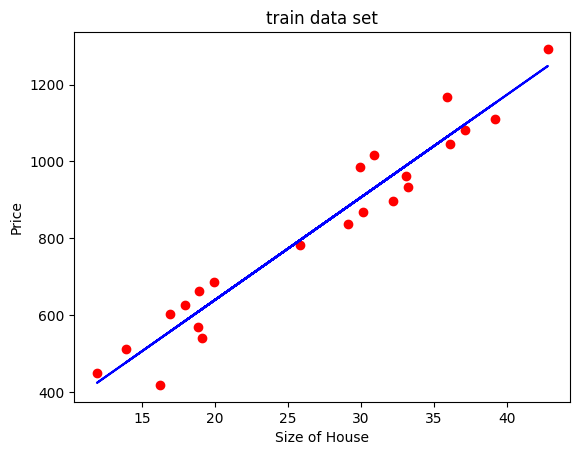

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('train data set')
plt.xlabel('Size of House')
plt.ylabel('Price')
plt.show()

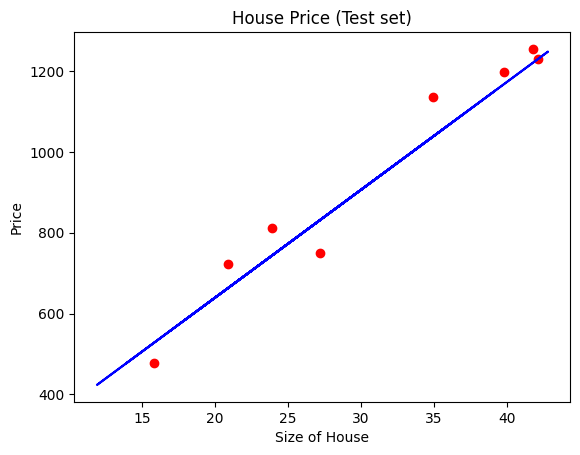

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('House Price (Test set)')
plt.xlabel('Size of House')
plt.ylabel('Price')
plt.show()

系数和截距

In [18]:
print(regressor.coef_)
print(regressor.intercept_)

[26.69958976]
105.556890563205
